In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import Markdown as md
from IPython.display import display, Image


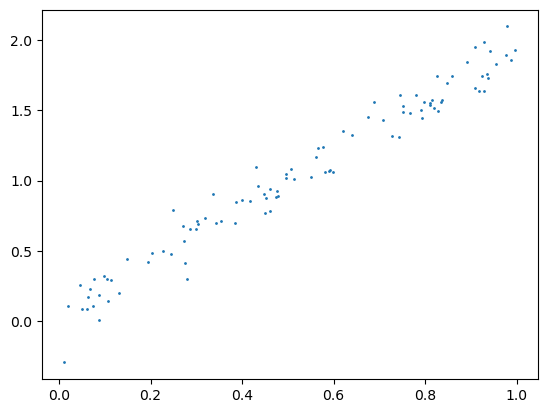

In [2]:
rng = np.random.default_rng()

N = 100    # Number of samples
σ = 0.1     # Noise variance
m = 2       # True slope
x = rng.uniform(0, 1, N)
y = m*x + rng.normal(0, σ, N)

plt.scatter(x, y, s=1)

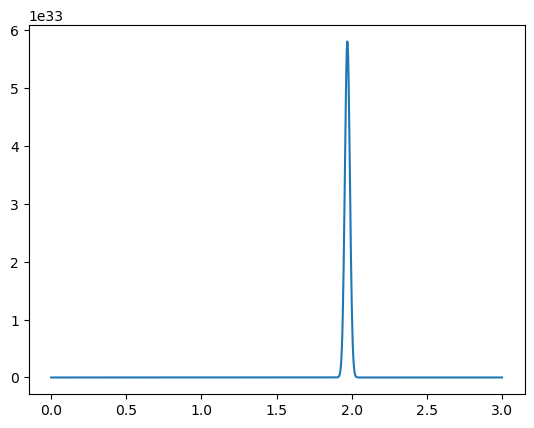

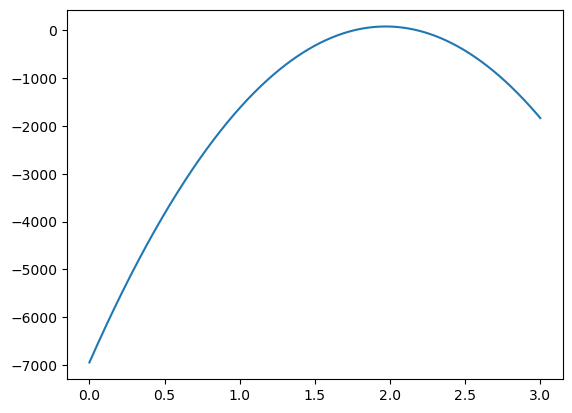

In [3]:
# p(v | m, u) = N(v | m*u, σ)

likelihood = lambda m̂: np.prod( 1/np.sqrt(2*np.pi*σ**2) * np.exp( -(y - m̂*x)**2/(2*σ**2) ) )
m_range = np.linspace(0, 3, 1000)

likelihood_range = np.zeros_like(m_range)
for (i, m̂) in enumerate(m_range):
    likelihood_range[i] = likelihood(m̂)

plt.plot(m_range, likelihood_range)
plt.show()

log_likelihood = lambda m̂: np.sum( -1/2*np.log(2*np.pi*σ**2) - (y - m̂*x)**2/(2*σ**2) )
log_likelihood_range = np.zeros_like(m_range)
for (i, m̂) in enumerate(m_range):
    log_likelihood_range[i] = log_likelihood(m̂)

plt.plot(m_range, log_likelihood_range)
plt.show()

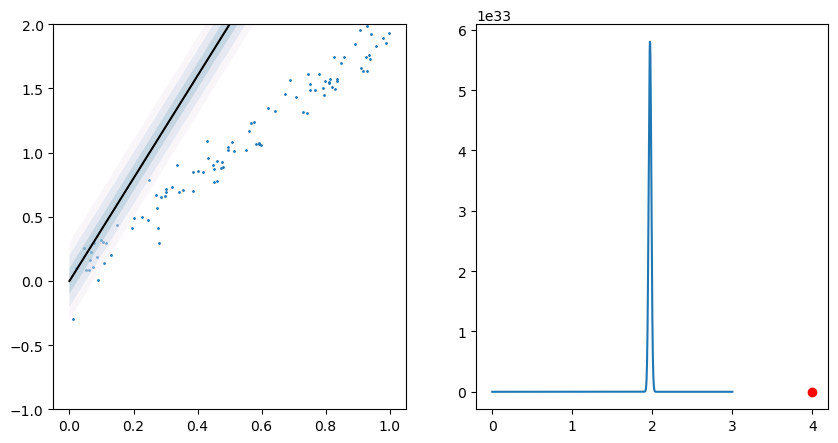

In [4]:
m̂ = 4
x_range = np.linspace(0, 1, 100)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x, y, s=1)
ax[0].plot(x_range, m̂*x_range, color='black', label='v = m*u')
ax[0].fill_between(x_range, m̂*x_range + 1*σ, m̂*x_range - 1*σ, color='#1c9099', alpha=0.3, label='σ', edgecolor='None')
ax[0].fill_between(x_range, m̂*x_range + 2*σ, m̂*x_range - 2*σ, color='#a6bddb', alpha=0.3, label='σ', edgecolor='None')
ax[0].fill_between(x_range, m̂*x_range + 3*σ, m̂*x_range - 3*σ, color='#ece2f0', alpha=0.3, label='σ', edgecolor='None')
ax[0].set_ylim(-1, 2)

ax[1].plot(m_range, likelihood_range)
ax[1].plot(m̂, likelihood(m̂), 'ro')

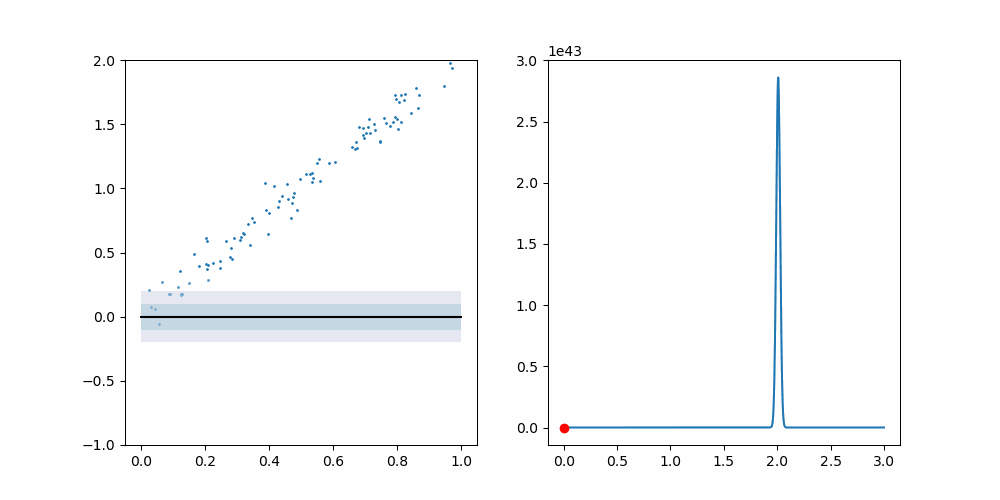

In [5]:
# x_range = np.linspace(0, 1, 100)

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# def AnimationFunction(t):

#      m̂ = 3*t/60
#      # Provide code needed to update animation
#      ax[0].clear()
#      ax[0].scatter(x, y, s=1)
#      ax[0].plot(x_range, m̂*x_range, color='black', label='v = m*u')
#      ax[0].fill_between(x_range, m̂*x_range + 1*σ, m̂*x_range - 1*σ, color='#1c9099', alpha=0.3, label='σ', edgecolor='None')
#      ax[0].fill_between(x_range, m̂*x_range + 2*σ, m̂*x_range - 2*σ, color='#a6bddb', alpha=0.3, label='σ', edgecolor='None')
#      ax[0].fill_between(x_range, m̂*x_range + 3*σ, m̂*x_range - 3*σ, color='#ece2f0', alpha=0.3, label='σ', edgecolor='None')
#      ax[0].set_ylim(-1, 2)
     
#      ax[1].clear()
#      ax[1].plot(m_range, likelihood_range)
#      ax[1].plot(m̂, likelihood(m̂), 'ro')

#      # Print the current time
#      print(t)


# f = filename, e.g.
f = r"..\images\ML-linear.gif" 

# anim = animation.FuncAnimation(fig, AnimationFunction, frames = 60, repeat=False)
# writergif = animation.PillowWriter(fps=15) 
# anim.save(f, writer=writergif)

display(Image(f))

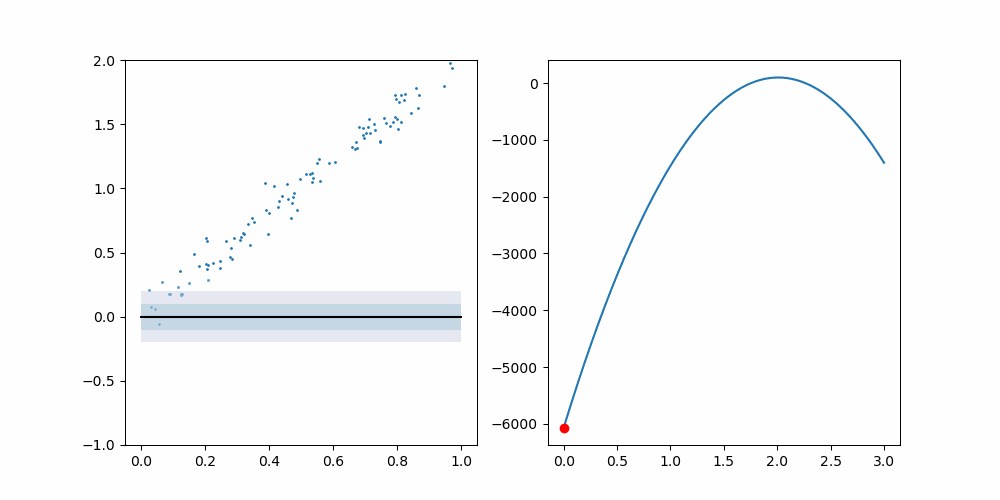

In [6]:
# x_range = np.linspace(0, 1, 100)

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# def AnimationFunction(t):

#      m̂ = 3*t/60
#      # Provide code needed to update animation
#      ax[0].clear()
#      ax[0].scatter(x, y, s=1)
#      ax[0].plot(x_range, m̂*x_range, color='black', label='v = m*u')
#      ax[0].fill_between(x_range, m̂*x_range + 1*σ, m̂*x_range - 1*σ, color='#1c9099', alpha=0.3, label='σ', edgecolor='None')
#      ax[0].fill_between(x_range, m̂*x_range + 2*σ, m̂*x_range - 2*σ, color='#a6bddb', alpha=0.3, label='σ', edgecolor='None')
#      ax[0].fill_between(x_range, m̂*x_range + 3*σ, m̂*x_range - 3*σ, color='#ece2f0', alpha=0.3, label='σ', edgecolor='None')
#      ax[0].set_ylim(-1, 2)
     
#      ax[1].clear()
#      ax[1].plot(m_range, log_likelihood_range)
#      ax[1].plot(m̂, log_likelihood(m̂), 'ro')

#      # Print the current time
#      print(t)


f = r"..\images\ML-loglinear.gif" 

# anim = animation.FuncAnimation(fig, AnimationFunction, frames = 60, repeat=False)
# writergif = animation.PillowWriter(fps=15) 
# anim.save(f, writer=writergif)

display(Image(f))

0.06283185307179588
0.001968305824198024


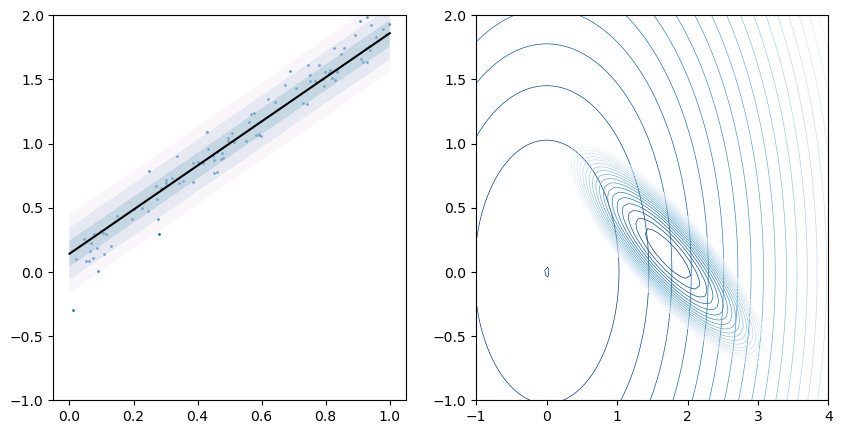

In [7]:
Φ = np.vstack([x, np.ones_like(x)]).T

σ_θ = 0.1
S0 = np.diag([σ_θ**2, σ_θ**2])
inv_S0 = np.diag([1/σ_θ**2, 1/σ_θ**2])
inv_SN = inv_S0 + Φ.T @ Φ / σ**2
SN = np.linalg.inv(inv_SN)
mn = SN @ Φ.T @ y / σ**2

σN = np.zeros_like(x_range) 
for (i, xp) in enumerate(x_range):
    ϕ = np.array([[xp],[1]])
    σN[i] = ( (σ**2 + ϕ.T @ SN @ ϕ)[0,0] )**0.5

# Generate x and y coordinates
N_grid = 75
X_grid, Y_grid = np.meshgrid(np.linspace(-1, 4, N_grid), np.linspace(-1, 2, N_grid))

# Calculate the multivariate normal distribution
prior = np.zeros_like(X_grid)
posterior = np.zeros_like(X_grid)
for i in range(N_grid):
    for j in range(N_grid):
        point = np.array([X_grid[i, j], Y_grid[i, j]])
        prior[i, j] = -(1/2)*(point) @ inv_S0 @ (point).T
        posterior[i, j] = -(1/2)*(point - mn) @ inv_SN @ (point - mn).T

# Create the contour plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x, y, s=1)
ax[0].plot(x_range, mn[0]*x_range + mn[1], color='black', label='v = m*u')
ax[0].fill_between(x_range, mn[0]*x_range + mn[1] + 1*σN, mn[0]*x_range + mn[1] - 1*σN, color='#1c9099', alpha=0.3, label='σ', edgecolor='None')
ax[0].fill_between(x_range, mn[0]*x_range + mn[1] + 2*σN, mn[0]*x_range + mn[1] - 2*σN, color='#a6bddb', alpha=0.3, label='σ', edgecolor='None')
ax[0].fill_between(x_range, mn[0]*x_range + mn[1] + 3*σN, mn[0]*x_range + mn[1] - 3*σN, color='#ece2f0', alpha=0.3, label='σ', edgecolor='None')
ax[0].set_ylim(-1, 2)

print(2*np.pi*np.linalg.det(S0)**0.5)
print(2*np.pi*np.linalg.det(SN)**0.5)

ax[1].contour(X_grid, Y_grid, prior, levels=np.linspace(-1000, -0.1, 20), cmap='Blues', linewidths=0.5)
ax[1].contour(X_grid, Y_grid, posterior, levels=np.linspace(-1000, -0.1, 20), cmap='Blues', linewidths=0.5)



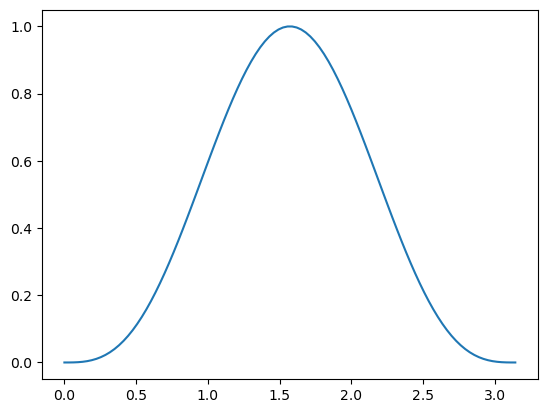

In [8]:
testx = np.linspace(0, np.pi,100)
plt.plot(testx, np.sin(testx)**3)

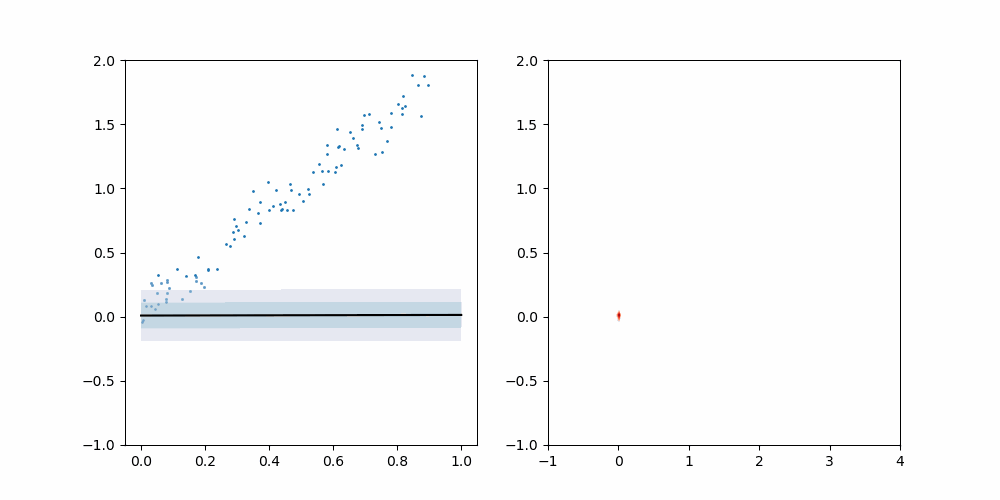

In [9]:
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# fps = 15
# frames = 60
# def AnimationFunction(t):

#     # 0.001 to 0.02
#     σ_θ = 0.001 + 0.1*np.sin(np.pi*t/frames)**4
#     S0 = np.diag([σ_θ**2, σ_θ**2])
#     inv_S0 = np.diag([1/σ_θ**2, 1/σ_θ**2])
#     inv_SN = inv_S0 + Φ.T @ Φ / σ**2
#     SN = np.linalg.inv(inv_SN)
#     mn = SN @ Φ.T @ y / σ**2

#     σN = np.zeros_like(x_range) 
#     for (i, xp) in enumerate(x_range):
#         ϕ = np.array([[xp],[1]])
#         σN[i] = ( (σ**2 + ϕ.T @ SN @ ϕ)[0,0] )**0.5


#     # Calculate the multivariate normal distribution
#     prior = np.zeros_like(X_grid)
#     posterior = np.zeros_like(X_grid)
#     for i in range(N_grid):
#         for j in range(N_grid):
#             point = np.array([X_grid[i, j], Y_grid[i, j]])
#             prior[i, j] = -(1/2)*(point) @ inv_S0 @ (point).T
#             posterior[i, j] = -(1/2)*(point - mn) @ inv_SN @ (point - mn).T

#     # Create the contour plot
#     ax[0].clear()
#     ax[0].scatter(x, y, s=1)
#     ax[0].plot(x_range, mn[0]*x_range + mn[1], color='black', label='v = m*u')
#     ax[0].fill_between(x_range, mn[0]*x_range + mn[1] + 1*σN, mn[0]*x_range + mn[1] - 1*σN, color='#1c9099', alpha=0.3, label='σ', edgecolor='None')
#     ax[0].fill_between(x_range, mn[0]*x_range + mn[1] + 2*σN, mn[0]*x_range + mn[1] - 2*σN, color='#a6bddb', alpha=0.3, label='σ', edgecolor='None')
#     ax[0].fill_between(x_range, mn[0]*x_range + mn[1] + 3*σN, mn[0]*x_range + mn[1] - 3*σN, color='#ece2f0', alpha=0.3, label='σ', edgecolor='None')
#     ax[0].set_ylim(-1, 2)

#     ax[1].clear()
#     ax[1].contour(X_grid, Y_grid, prior, levels=np.linspace(-1000, -0.1, 20), cmap='Blues', linewidths=0.5)
#     ax[1].contour(X_grid, Y_grid, posterior, levels=np.linspace(-1000, -0.1, 20), cmap='Reds', linewidths=0.5)# Print the current time
#     print(t)


# f = filename, e.g.
f = r"..\images\MAP-linear.gif" 

# anim = animation.FuncAnimation(fig, AnimationFunction, frames = frames, repeat=False)
# writergif = animation.PillowWriter(fps=fps) 
# anim.save(f, writer=writergif)

display(Image(f))

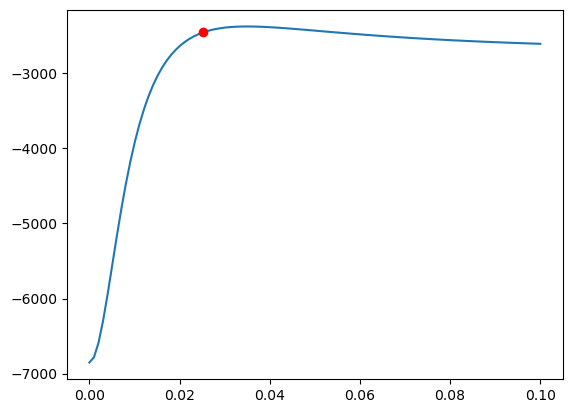

In [10]:
σ_θ_vec = np.linspace(0.00001, 0.1, 100)
log_py = np.zeros_like(σ_θ_vec)
for (i, σ_θ) in enumerate(σ_θ_vec):
    S0 = np.diag([σ_θ**2, σ_θ**2])
    inv_S0 = np.diag([1/σ_θ**2, 1/σ_θ**2])
    inv_SN = inv_S0 + Φ.T @ Φ / σ**2
    SN = np.linalg.inv(inv_SN)
    mn = SN @ Φ.T @ y / σ**2

    Em = np.sum((mn[0]*x_range + mn[1] - y)**2) / (2*σ**2) + np.sum(mn**2) / (2*σ_θ**2)
    log_py[i] = -2*np.log(σ_θ) - N*np.log(σ) - 1/2*np.log(np.linalg.det(inv_SN)) - Em

plt.plot(σ_θ_vec, log_py)
k = 25
plt.plot(σ_θ_vec[k], log_py[k], 'ro')
